# Exploratory Data Analyis

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# CONFIG

# project root
PR = "../"
# datafile containing all the function and types
FUNCTION_FILE = os.path.join(PR, "output/data/2ndWatchcloudendure-python-functions.csv")

def list_data_files(datadir, full=True):
    paths = []
    for file in os.listdir(datadir):
        if not os.path.isfile(os.path.join(datadir, file)):
            continue
        
        paths.append(os.path.join(datadir, file) if full else file)
    
    return paths

def parse_df(files):
    df = None
    
    for i, file in enumerate(files):
        if i % 100 == 0:
            print(f"Loaded {i}/{len(files)} files")
        
        if df is None:
            df = pd.read_csv(file)
        else:
            df = pd.concat([df, pd.read_csv(file)])
    
    return df

def format_df(df):
    """Add """
    df['arg_names'] = df['arg_names'].apply(lambda x: tuple(eval(x)))
    df['arg_types'] = df['arg_types'].apply(lambda x: np.asarray(eval(x)))
    
    return df

DATA_FILES = list_data_files(os.path.join(PR, "output/data"))
print("Found %d datafiles" % len(DATA_FILES))

df = parse_df(DATA_FILES[:1000])
print("Dataframe loaded!")

print("Formatting dataframe")
df = format_df(df)
print("Dataframe formatted")

Found 3475 datafiles
Loaded 0/1000 files
Loaded 100/1000 files
Loaded 200/1000 files
Loaded 300/1000 files
Loaded 400/1000 files
Loaded 500/1000 files
Loaded 600/1000 files
Loaded 700/1000 files
Loaded 800/1000 files
Loaded 900/1000 files
Dataframe loaded!
Formatting dataframe
Dataframe formatted


In [17]:
df.to_csv("_temp.csv")

In [19]:
df

,Unnamed: 0,author,repo,file,has_type,name,docstring,func_descr,arg_names,arg_types,arg_descrs,return_type,return_expr,return_descr,arg_names_len,arg_types_len,docstring_length
0,0,ocf,ocfweb,./projects/ocf__ocfweb/ocfweb/auth.py,False,decorator,NaN,NaN,"(request, args)","[, ]","['', '']",NaN,"['function request args kwargs', 'http respons...",NaN,2,2,0
1,1,ocf,ocfweb,./projects/ocf__ocfweb/ocfweb/auth.py,False,login require,NaN,NaN,"(function,)",[],[''],NaN,['decorator'],NaN,1,1,0
2,2,ocf,ocfweb,./projects/ocf__ocfweb/ocfweb/auth.py,False,decorator,NaN,NaN,"(request, args)","[, ]","['', '']",NaN,"['function request args kwargs', 'render reque...",NaN,2,2,0
3,3,ocf,ocfweb,./projects/ocf__ocfweb/ocfweb/auth.py,False,group account require,NaN,NaN,"(function,)",[],[''],NaN,['decorator'],NaN,1,1,0
4,4,ocf,ocfweb,./projects/ocf__ocfweb/ocfweb/auth.py,False,wrapper,NaN,NaN,"(request, args)","[, ]","['', '']",NaN,"['fn request args kwargs', 'http response redi...",NaN,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,10,a-musing-moose,almanac,./projects/a-musing-moose__almanac/almanac/reg...,True,register,NaN,NaN,"(self, service)","[, Any]","['', '']",None,[],NaN,2,2,0
11,11,a-musing-moose,almanac,./projects/a-musing-moose__almanac/almanac/reg...,True,get,NaN,NaN,"(self, contract)","[, type]","['', '']",Any,['self. service contract name'],NaN,2,2,0
12,12,a-musing-moose,almanac,./projects/a-musing-moose__almanac/almanac/exc...,True,init,NaN,NaN,"(self, contract name)","[, str]","['', '']",None,[],NaN,2,2,0
13,13,a-musing-moose,almanac,./projects/a-musing-moose__almanac/almanac/exc...,True,init,NaN,NaN,"(self, service class)","[, ]","['', '']",None,[],NaN,2,2,0


## Analysis of docstring

#### Questions:
    - What is the distribution fo the docstring length

In [4]:
df['docstring_length'] = df['docstring'].fillna('').apply(len)
df['docstring_length'].describe()

count    561039.000000
mean         29.150462
std         135.035843
min           0.000000
25%           0.000000
50%           0.000000
75%          26.000000
max       44453.000000
Name: docstring_length, dtype: float64

In [26]:
from scipy import stats
outliars = np.abs(stats.zscore(df['docstring_length'])) > 3 # zscore > 3


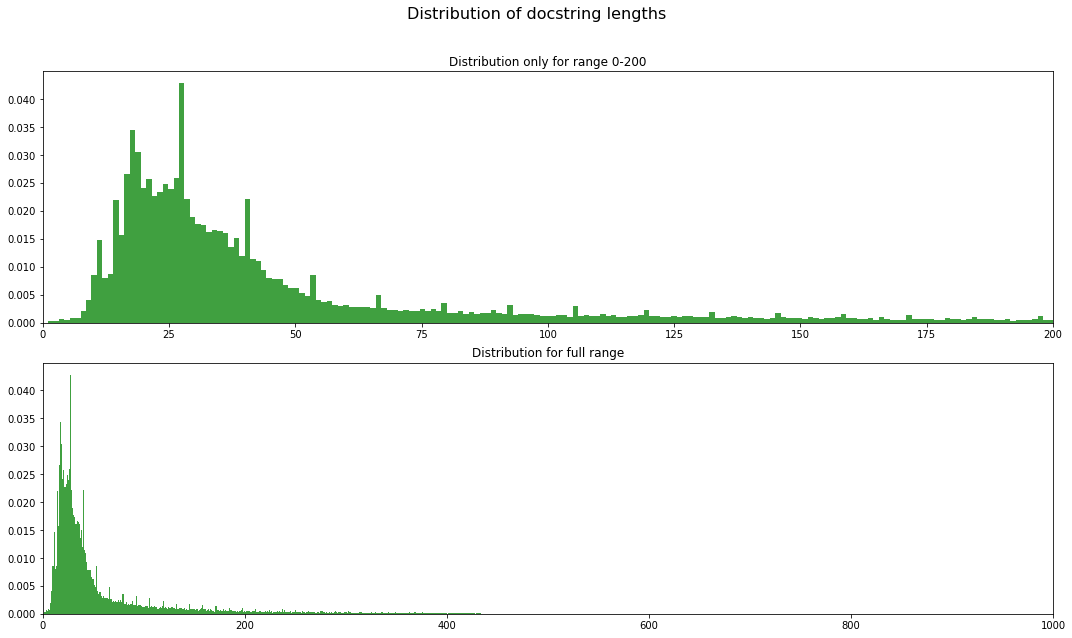

In [41]:
dd = df['docstring_length'][(df['docstring_length'] > 0) & np.invert(outliars)]
bins = 400

fig = plt.figure(figsize=(15, 9))
fig.suptitle("Distribution of docstring lengths", fontsize=16)

plt.subplot(2, 1, 1)
plt.title("Distribution only for range 0-200")
plt.hist(dd, bins, density=True, facecolor='g', alpha=0.75)
plt.xlim([0, 200])

plt.subplot(2, 1, 2)
plt.title("Distribution for full range")
plt.hist(dd, bins, density=True, facecolor='g', alpha=0.75)
plt.xlim([0, 1000])

fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

## Analysis of arg-{types, names}

#### Questions: 
    - How many functions have types? What is the ration of the total
    - What is the distribution of the function arguments?
    - What are the most common arg types?


In [6]:
with_type = df['has_type']
print(f"Function with type {with_type.sum()}/{len(df)}={with_type.sum()/len(df):0.3f}")

Function with type 117763/561039=0.210


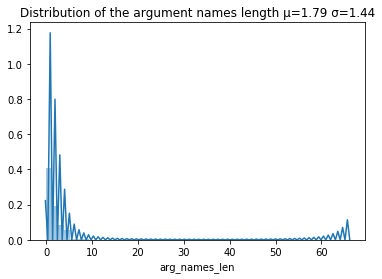

In [7]:
sns.distplot(df['arg_names_len'])
plt.title(f"Distribution of the argument names length \u03BC={df['arg_names_len'].mean():0.2f}" \
          f" σ={df['arg_names_len'].std():0.2f}")
plt.show()

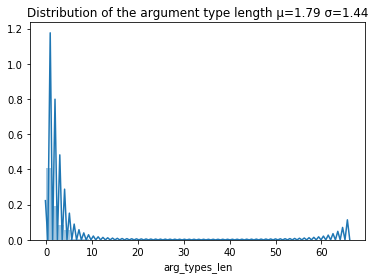

In [8]:
sns.distplot(df['arg_types_len'])
plt.title(f"Distribution of the argument type length \u03BC={df['arg_types_len'].mean():0.2f}" \
          f" σ={df['arg_types_len'].std():0.2f}")
plt.show()

In [9]:
all_types = np.hstack(df['arg_names'].values)
unique, counts = np.unique(all_types, return_counts=True)
print(f"A total of {len(unique)} unique names were gathered.")

print(f"Most common argument names are:")
for i in np.argsort(counts)[-20:][::-1]:
    print(f"-- {unique[i]}     \t\t\t{counts[i]}")

A total of 38521 unique names were gathered.
Most common argument names are:
-- self     			378000
-- ha     			15491
-- name     			13007
-- args     			12635
-- node     			9264
-- config     			8938
-- cl     			8730
-- value     			8590
-- request     			8091
-- data     			7179
-- text     			6858
-- x     			5143
-- path     			4777
-- filename     			4343
-- discovery info     			4280
-- other     			3943
-- key     			3872
-- context     			3384
-- result     			3374
-- event     			3211


In [10]:
all_types = np.hstack(df['arg_types'].values)
unique, counts = np.unique(all_types, return_counts=True)
print(f"A total of {len(unique)} unique types were gathered.")

print(f"Most common argument types are:")
for i in np.argsort(counts)[-20:][::-1]:
    print(f"-- {unique[i]}      \t\t\t{counts[i]}")

A total of 8778 unique types were gathered.
Most common argument types are:
--       			861825
-- str      			29399
-- int      			14034
-- bool      			7445
-- Any      			4099
-- Dict[str, Any]      			3266
-- float      			2704
-- Optional[str]      			2445
-- UserProfile      			2440
-- HttpRequest      			1976
-- List[str]      			1838
-- bytes      			1456
-- torch.Tensor      			1307
-- Text      			1307
-- dict      			1262
-- Path      			1205
-- Optional[int]      			951
-- Realm      			792
-- Dict      			704
-- np.ndarray      			685


# Checks

In [11]:
# Arguments should always be equal to type len
(df['arg_types_len'] == df['arg_names_len']).sum() == len(df)

True

In [12]:
# If not which are the rows in question
df[df['arg_types_len'] != df['arg_names_len']]

,Unnamed: 0,author,repo,file,has_type,name,docstring,func_descr,arg_names,arg_types,arg_descrs,return_type,return_expr,return_descr,arg_names_len,arg_types_len,docstring_length
